In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Preprocessing 

In [3]:
data_path="./data.csv"
df=pd.read_csv(data_path,sep=",")

# Attribute Information:
Input variables:
1 - age (numeric)

2 - job : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','
student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced'
means divorced or widowed)

4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unk
nown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance:

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly
affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a
call is performed. Also, after the end of the call y is obviously known. Thus, this input should
only be included for benchmark purposes and should be discarded if the intention is to have a
realistic predictive model.

# other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
Output variable (desired target):

17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [5]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,52,management,married,tertiary,no,388,no,no,cellular,25,may,272,1,-1,0,unknown,yes
8367,39,services,married,secondary,no,2758,no,no,cellular,4,feb,658,3,-1,0,unknown,yes
8368,38,blue-collar,married,primary,no,178,yes,no,unknown,20,may,245,1,-1,0,unknown,no
8369,59,retired,divorced,unknown,no,-49,yes,no,unknown,13,may,248,2,-1,0,unknown,no


In [6]:
#Checking out the categories and their respective counts in each feature
print("Age:",df.age.value_counts(),sep = '\n')
print("-"*40)
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Balance:",df.balance.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Duration:",df.duration.value_counts(),sep = '\n')
print("-"*40)
print("Campaign:",df.campaign.value_counts(),sep = '\n')
print("-"*40)
print("pdays:",df.pdays.value_counts(),sep = '\n')
print("-"*40)
print("Previous:",df.previous.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign(Deposit):",df.deposit.value_counts(),sep = '\n')
print("-"*40)


Age:
31    370
32    368
34    354
35    347
33    343
     ... 
90      2
87      2
93      1
88      1
95      1
Name: age, Length: 75, dtype: int64
----------------------------------------
Job:
management       1923
blue-collar      1472
technician       1371
admin.           1017
services          671
retired           563
self-employed     307
unemployed        282
student           273
entrepreneur      244
housemaid         197
unknown            51
Name: job, dtype: int64
----------------------------------------
Marital:
married     4744
single      2645
divorced     982
Name: marital, dtype: int64
----------------------------------------
Education:
secondary    4113
tertiary     2754
primary      1128
unknown       376
Name: education, dtype: int64
----------------------------------------
Default:
no     8244
yes     127
Name: default, dtype: int64
----------------------------------------
Balance:
0        601
2         29
3         26
1         20
4         20
        ... 
71

# Dealing with Unknown Values

 In the dataset there is no missing values but there are some "Unknown" values which are actually missing values for us. So I start to pre-processing by removing this values from dataset.

In [7]:
for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [8]:
df.reset_index(inplace=True,drop=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
2,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no
3,48,blue-collar,married,secondary,no,1730,yes,no,cellular,4,may,361,1,89,3,success,yes
4,26,services,single,secondary,no,1347,no,no,telephone,18,jun,280,6,92,5,other,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,53,technician,married,primary,no,6181,no,no,cellular,14,jul,817,2,209,3,other,yes
1979,34,admin.,married,secondary,no,920,no,no,cellular,14,may,526,3,179,3,success,yes
1980,23,student,single,secondary,no,0,no,no,cellular,30,apr,297,1,83,6,success,yes
1981,42,blue-collar,married,secondary,no,413,yes,no,cellular,11,feb,456,2,184,2,success,yes


In [9]:
#Checking out the categories and their respective counts in each feature
print("Age:",df.age.value_counts(),sep = '\n')
print("-"*40)
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Balance:",df.balance.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Duration:",df.duration.value_counts(),sep = '\n')
print("-"*40)
print("Campaign:",df.campaign.value_counts(),sep = '\n')
print("-"*40)
print("pdays:",df.pdays.value_counts(),sep = '\n')
print("-"*40)
print("Previous:",df.previous.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign(Deposit):",df.deposit.value_counts(),sep = '\n')
print("-"*40)

Age:
34    93
33    92
31    87
35    84
37    83
      ..
65     3
84     2
83     2
74     2
18     1
Name: age, Length: 67, dtype: int64
----------------------------------------
Job:
management       500
technician       333
admin.           289
blue-collar      259
retired          160
services         137
student           91
unemployed        73
self-employed     73
housemaid         35
entrepreneur      33
Name: job, dtype: int64
----------------------------------------
Marital:
married     1097
single       698
divorced     188
Name: marital, dtype: int64
----------------------------------------
Education:
secondary    1015
tertiary      769
primary       199
Name: education, dtype: int64
----------------------------------------
Default:
no     1975
yes       8
Name: default, dtype: int64
----------------------------------------
Balance:
0       110
2557     10
62        6
2         6
203       6
       ... 
2353      1
4831      1
1441      1
1442      1
625       1
Name: bala

In [10]:
df.default.value_counts()

no     1975
yes       8
Name: default, dtype: int64

Since default feature is mostly "no" which is highly imbalanced, I also drop this feature

In [11]:
df.drop("default",inplace=True,axis=1)

In [12]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'], dtype=object)

# Exploratory Data Analysis and Pre-Processing

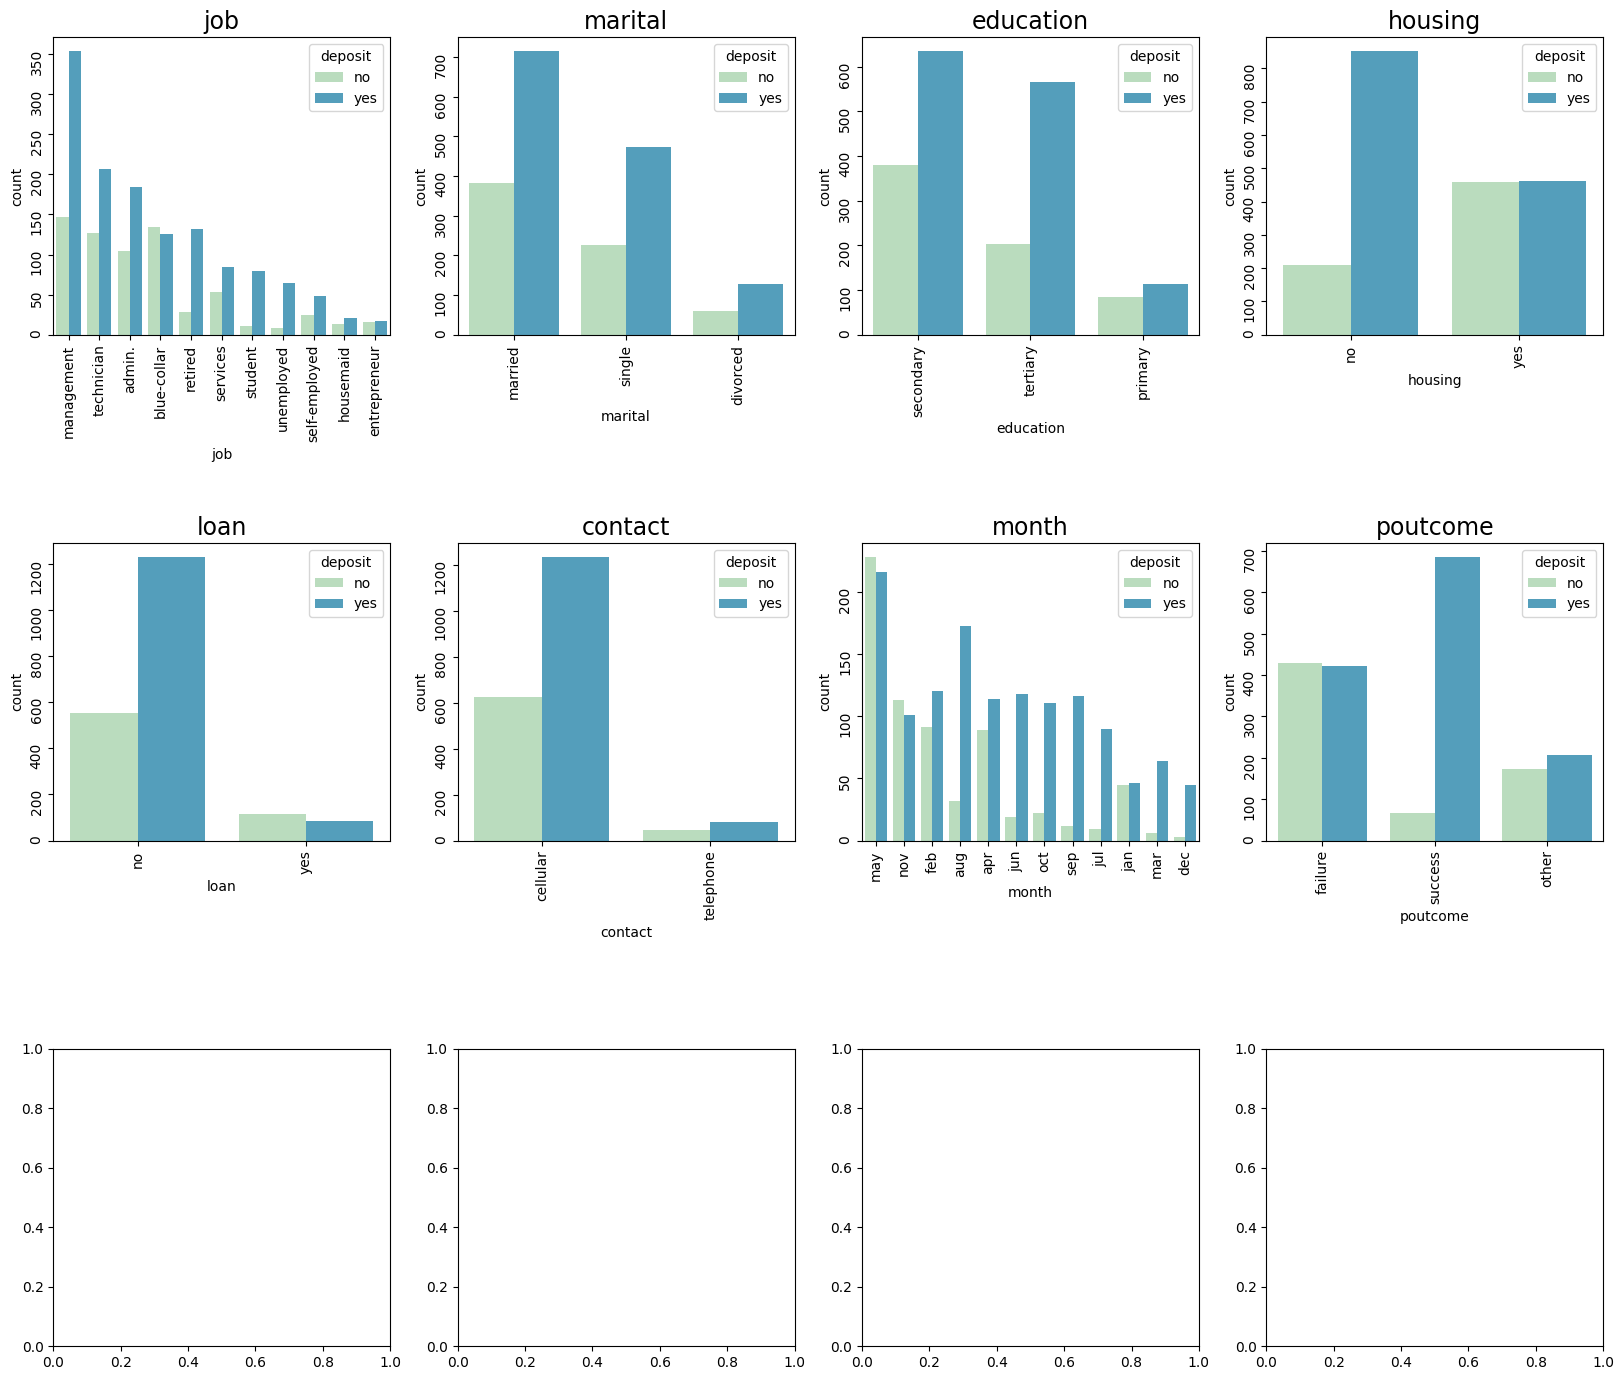

In [13]:
fig, ax = plt.subplots(3,4, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='deposit', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

In [14]:
df.poutcome.value_counts()

failure    853
success    751
other      379
Name: poutcome, dtype: int64

In poutcome feature, there is also a problem with missing value, but since it is too much data, I convert them to 0

In [15]:
df.poutcome = df.poutcome.map({'other':0, 'failure':0, 'success':1}).astype('uint8') 

In [16]:
df.poutcome.value_counts()

0    1232
1     751
Name: poutcome, dtype: int64

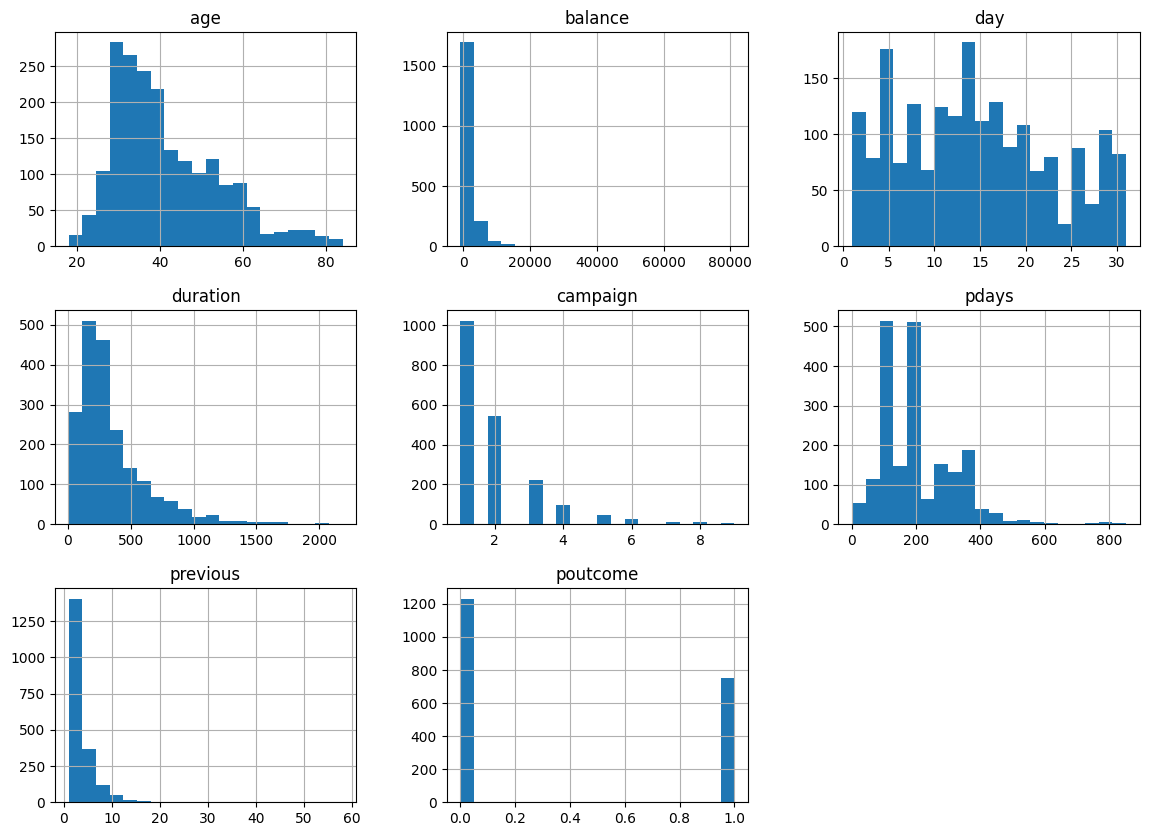

In [17]:
df.hist(bins=20, figsize=(14,10))
plt.show()

In [18]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,poutcome
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,41.520424,1680.713061,14.267272,348.166919,1.889561,200.406455,3.297529,0.378719
std,12.658061,3320.315775,8.268280,285.639184,1.292065,119.632013,3.611875,0.485190
min,18.000000,-938.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.000000
25%,32.000000,203.000000,7.000000,161.000000,1.000000,97.000000,1.000000,0.000000
50%,38.000000,687.000000,13.000000,263.000000,1.000000,182.000000,2.000000,0.000000
75%,49.000000,2030.000000,20.000000,438.500000,2.000000,275.000000,4.000000,1.000000
max,84.000000,81204.000000,31.000000,2184.000000,9.000000,854.000000,58.000000,1.000000


Age range, from 18 to 95 years old. However, a majority of age of 30s and 40s (32 to 49 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

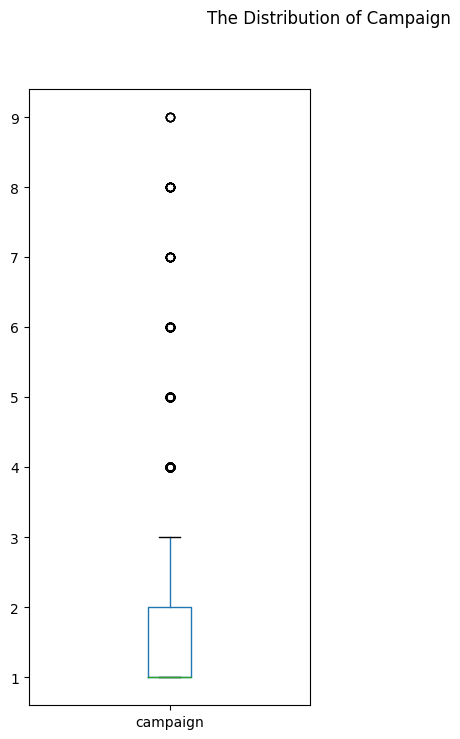

In [19]:
df[['campaign']].plot(kind = 'box', 
                                              figsize = (8,8),
                                              subplots = True, layout = (1,2),
                                              sharex = False, sharey = False,
                                              title='The Distribution of Campaign')
plt.show()

In [20]:
# Convert target variable into numeric
df.deposit = df.deposit.map({'no':0, 'yes':1}).astype('uint8')

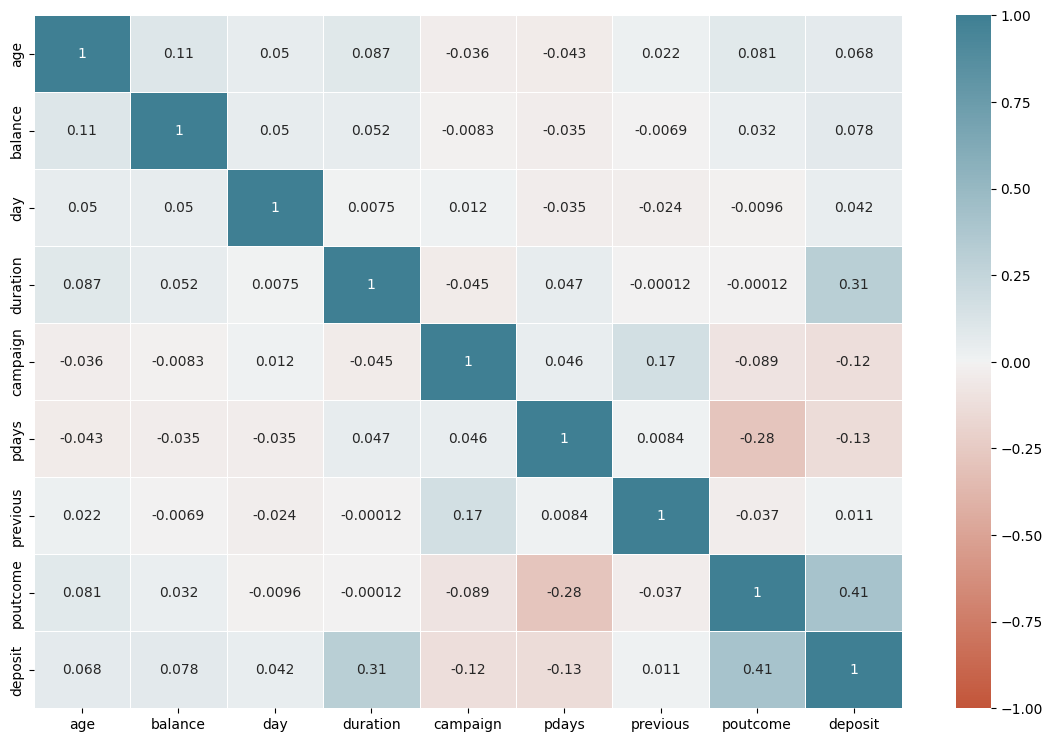

In [21]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()


Since pdays and previous features are correlated, I convert previous feature to categorical feature.

In [22]:
df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') 

In [23]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,127,yes,no,cellular,14,oct,113,1,50,1,1,0
1,39,management,single,tertiary,2454,yes,no,cellular,4,may,716,3,263,1,0,1
2,37,services,married,secondary,1694,yes,yes,cellular,29,jan,404,2,251,1,0,0
3,48,blue-collar,married,secondary,1730,yes,no,cellular,4,may,361,1,89,1,1,1
4,26,services,single,secondary,1347,no,no,telephone,18,jun,280,6,92,1,0,1


Encoding the remaining features

In [24]:
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

# Modelling 
 A decision tree is a simple, decision making-diagram.
Random forests are a large number of trees, combined (using averages or “majority rules”) at the end of the process.
Gradient boosting machines also combine decision trees, but start the combining process at the beginning, instead of at the end.
Both RF and GBM are ensemble methods, meaning you build a classifier out a big number of smaller classifiers. Now the fundamental difference lies on the method used:

RF uses decision trees, which are very prone to overfitting. In order to achieve higher accuracy, RF decides to create a large number of them based on bagging. The basic idea is to resample the data over and over and for each sample train a new classifier. Different classifiers overfit the data in a different way, and through voting those differences are averaged out.
GBM is a boosting method, which builds on weak classifiers. The idea is to add a classifier at a time, so that the next classifier is trained to improve the already trained ensemble. Notice that for RF each iteration the classifier is trained independently from the rest.
Boosting model is popular these days and Xgboost and LightGBM are most used ones.

In XGBoost, trees grow depth-wise while in LightGBM, trees grow leaf-wise which is the fundamental difference between the two frameworks

In [25]:
#Data Splitting Libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
X = df.iloc[:,df.columns != 'deposit']
y = df.deposit
print("X Columns: ",list(X.columns))
print("Y Column:",list(y))

X Columns:  ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
Y Column: [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [27]:
def importance(model,X):
    questions = pd.DataFrame({'features': X.columns,'importance': (model.feature_importances_)*100})
    questions.sort_values(by='importance', ascending=False)
    questions = questions.sort_values(by='importance', ascending=False)
    return questions

In [28]:
def ML_training(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    log_lm = LogisticRegression()
    log_lm.fit(X_train, y_train)
    logy_pred = log_lm.predict(X_test)
    acclr = accuracy_score(y_test, logy_pred)*100
    logquestions = pd.DataFrame({'features': X.columns,'Coef': (log_lm.coef_[0])*100})
    logquestions = logquestions.sort_values(by='Coef', ascending=False)
    ##############################
    dtree=DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    dtreey_pred = dtree.predict(X_test)
    accdtree = accuracy_score(y_test, dtreey_pred)*100
    dtreequestions = importance(dtree,X)
    ##############################
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rfy_pred = rf.predict(X_test)
    accrf = accuracy_score(y_test, rfy_pred)*100
    accquestions = importance(rf,X)
    #############################
    gbrt = GradientBoostingClassifier(random_state=42)
    gbrt.fit(X_train, y_train)
    gbrt_pred=gbrt.predict(X_test)
    accgbrt = accuracy_score(y_test, gbrt_pred)*100
    gbrtaccquestions = importance(gbrt,X)
    #############################
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred=knn.predict(X_test)
    knngbrt = accuracy_score(y_test, knn_pred)*100
    #knnaccquestions = importance(knn)

    # Reporting
    print("Logistic Regression Report in test set")
    print(classification_report(y_test, logy_pred))
    print(confusion_matrix(y_test,logy_pred))
    print(logquestions)
    print("------------------------------------------------------")
    print("Decision Tree Report in test set")
    print(classification_report(y_test, dtreey_pred))
    print(confusion_matrix(y_test,dtreey_pred))
    print(dtreequestions)
    print("------------------------------------------------------")
    print("Random Forest Report in test set")
    print(classification_report(y_test, rfy_pred))
    print(confusion_matrix(y_test,rfy_pred))
    print(accquestions)
    print("------------------------------------------------------")
    print("Gradient Boosting in test set")
    print(classification_report(y_test, gbrt_pred))
    print(confusion_matrix(y_test,gbrt_pred))
    print(gbrtaccquestions)
    print("------------------------------------------------------")
    print("K Neighbors in test set")
    print(classification_report(y_test, knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    #print(knnaccquestions)
    print("------------------------------------------------------")

In [29]:
ML_training(X,y)

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.68      0.53      0.59       129
           1       0.79      0.88      0.84       268

    accuracy                           0.77       397
   macro avg       0.74      0.70      0.71       397
weighted avg       0.76      0.77      0.76       397

[[ 68  61]
 [ 32 236]]
     features       Coef
14   poutcome  78.566411
3   education  19.040916
1         job   3.651018
2     marital   1.815759
8         day   1.350780
0         age   0.636776
10   duration   0.400677
9       month   0.273923
4     balance   0.005237
12      pdays  -0.126228
7     contact  -0.598727
13   previous  -4.708433
6        loan -20.890670
11   campaign -56.447293
5     housing -64.635798
------------------------------------------------------
Decision Tree Report in test set
              precision    recall  f1-score   support

           0       0.59      0.64      0.62       129
           1  

# Balanced Dataset without Feature Selection

In [30]:
print("Unbalanced Data shape", len(df))
datano = df[df.deposit == 0]
datayes = df[df.deposit == 1]
balanced_df = pd.concat([datayes.sample(len(datano), random_state=5), datano])
print("Balanced data shape:", len(balanced_df))

Unbalanced Data shape 1983
Balanced data shape: 1338


In [31]:
balanced_df.deposit.value_counts()

1    669
0    669
Name: deposit, dtype: int64

In [32]:
balanced_df.reset_index(inplace=True,drop=True)

In [33]:
X_balanced = balanced_df.iloc[:,balanced_df.columns != 'deposit']
y_balanced = balanced_df.deposit
print("X Columns: ",list(X_balanced.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [34]:
ML_training(X_balanced,y_balanced)

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       136
           1       0.69      0.74      0.72       132

    accuracy                           0.71       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.71      0.71      0.71       268

[[92 44]
 [34 98]]
     features       Coef
14   poutcome  58.412176
3   education  11.654212
1         job   5.457524
9       month   1.937204
10   duration   0.390459
8         day   0.264398
4     balance   0.004239
12      pdays  -0.092395
0         age  -0.654438
7     contact  -0.918807
13   previous  -7.395130
2     marital  -9.209279
6        loan -18.422342
5     housing -47.277628
11   campaign -50.487922
------------------------------------------------------
Decision Tree Report in test set
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       136
           1      

As you can see in the balanced dataset results, our precision and recall results quite similar so our model can also predict well to "yes" values in target feature.
Still duration feature is highly dominant in every model.
Scaled dataset does not improved the score.
Random Forest Classifer perform best so for. Let's build a model for Random Forest with some hyperparameters

# Balanced Data with Some Feature Scaling

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size = 0.20, random_state = 0)


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]}


In [37]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = 4)

In [38]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [1, 23, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [20, 65, 110, 155, 200]},
             verbose=2)

In [39]:
rf_Grid.best_params_

{'max_depth': 23,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 155}

In [41]:

rf = RandomForestClassifier(n_estimators=155,max_depth=45, max_features="auto", min_samples_split=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_train, y_train)))


Accuracy of Random Forest classifier on test set: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

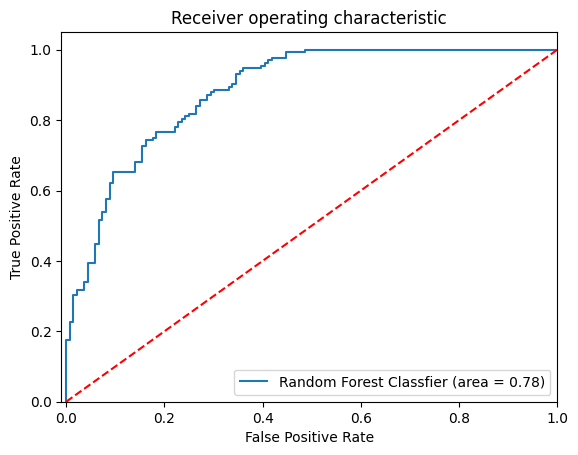

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classfier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**Feature importance with LOFO (Leave One Feature Out)**
 
LOFO (Leave One Feature Out) Importance calculates the importances of a set of features based on a metric of choice, for a model of choice, by iteratively removing each feature from the set, and evaluating the performance of the model, with a validation scheme of choice, based on the chosen metric.

LOFO first evaluates the performance of the model with all the input features included, then iteratively removes one feature at a time, retrains the model, and evaluates its performance on a validation set. The mean and standard deviation (across the folds) of the importance of each feature is then reported.

LOFO has several advantages compared to other importance types:

It does not favor granular features
It generalises well to unseen test sets
It is model agnostic
It gives negative importance to features that hurt performance upon inclusion
It can group the features. Especially useful for high dimensional features like TFIDF or OHE features.
It can automatically group highly correlated features to avoid underestimating their importance.

In [ ]:
%pip install lofo-importance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

100%|██████████| 15/15 [00:44<00:00,  2.99s/it]


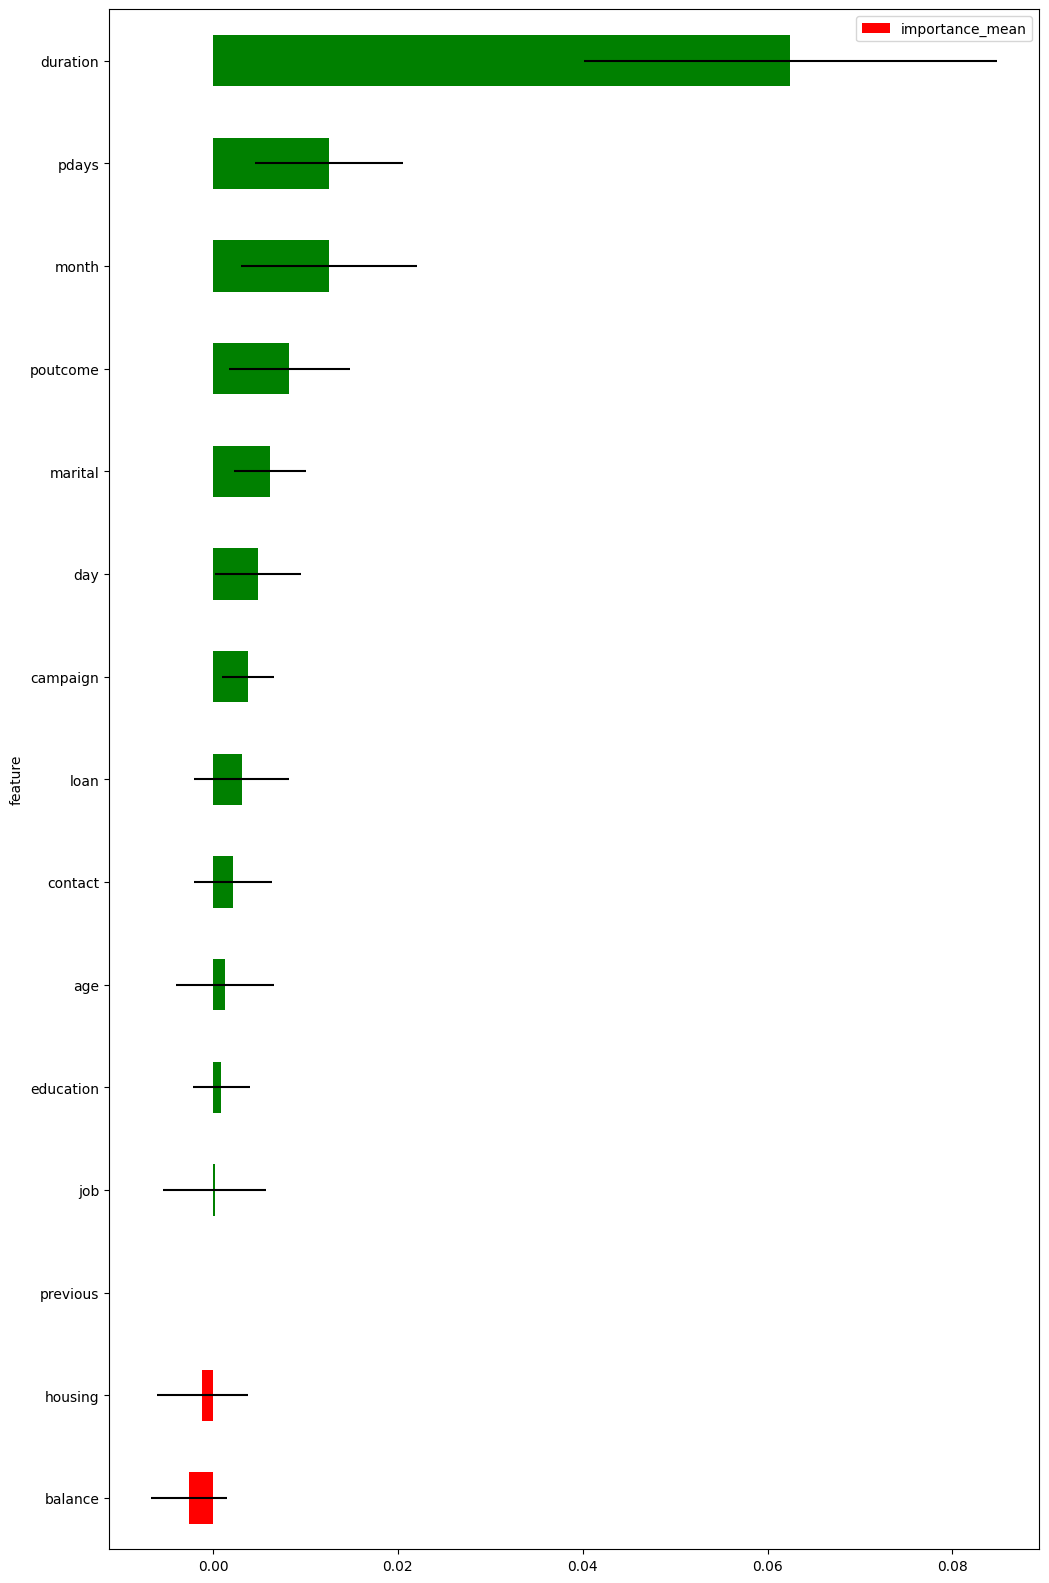

In [ ]:
cv = KFold(n_splits=4, shuffle=True, random_state=0)

# define the binary target and the features
dataset = Dataset(df=balanced_df, target="deposit", features=[col for col in balanced_df.columns if col != "deposit"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

In [ ]:
data_path="./test_data.csv"
tdf=pd.read_csv(data_path,sep=",")

